In [152]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tomedataset/train_csv.csv
/kaggle/input/tomedataset/test_csv.csv
/kaggle/input/playground-series-s4e9/sample_submission.csv
/kaggle/input/playground-series-s4e9/train.csv
/kaggle/input/playground-series-s4e9/test.csv


In [153]:
dtrain = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')
dtest = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')
dsub = pd.read_csv('/kaggle/input/playground-series-s4e9/sample_submission.csv')

# Filling NA values

In [154]:
print(dtrain.shape)
print(dtest.shape)

#first of all, i need to merge train data with test data so that it would not be workload for test in test prediction section.
#In training&testing phase, i can seperate the big data into train and test data the way it is originally.

df_full = pd.concat((dtrain,dtest),ignore_index= True, axis = 0)
print(df_full.shape)

(188533, 13)
(125690, 12)
(314223, 13)


In [155]:
df_full.isna().sum()

id                   0
brand                0
model                0
model_year           0
milage               0
fuel_type         8466
engine               0
transmission         0
ext_col              0
int_col              0
accident          4084
clean_title      35658
price           125690
dtype: int64

In [156]:
def correct_fuel_type(engine):
    # Check for each keyword in the engine description and assign the corresponding fuel type
    if 'Hybrid' in engine:
        return 'Hybrid'
    elif 'Gasoline' in engine or 'GDI' in engine:
        return 'Gasoline'
    elif 'Electric Motor' in engine or 'Electric'in engine or 'Battery' in engine or 'Dual Motor' in engine:
        return 'Electric'
    # Return None if none of the keywords match, so the original value is preserved

# Apply the function and combine with existing values in fuel_type
df_full['fuel_type'] = df_full['engine'].apply(correct_fuel_type).combine_first(df_full['fuel_type'])

In [157]:
df_full.isna().sum()

id                   0
brand                0
model                0
model_year           0
milage               0
fuel_type           64
engine               0
transmission         0
ext_col              0
int_col              0
accident          4084
clean_title      35658
price           125690
dtype: int64

In [158]:
df_full['fuel_type'].value_counts()

fuel_type
Gasoline          275422
Hybrid             11801
Electric           10202
E85 Flex Fuel       8822
Diesel              6593
–                   1302
Plug-In Hybrid        15
not supported          2
Name: count, dtype: int64

In [159]:
df_full.fillna({'fuel_type':'Gasoline'},inplace= True)

In [160]:
df_full.isna().sum()

id                   0
brand                0
model                0
model_year           0
milage               0
fuel_type            0
engine               0
transmission         0
ext_col              0
int_col              0
accident          4084
clean_title      35658
price           125690
dtype: int64

In [161]:
set(df_full['clean_title'])

{'Yes', nan}

In [162]:
print('total data: ',len(df_full['clean_title']))
print('clean data:',df_full['clean_title'].value_counts().values[0])
print('na data: ',len(df_full['clean_title'])-df_full['clean_title'].value_counts().values[0])

total data:  314223
clean data: 278565
na data:  35658


In [163]:
df_full.fillna({'clean_title': 'No'},inplace = True)

In [164]:
print(set(df_full['clean_title']))
print(df_full['clean_title'].value_counts())


{'Yes', 'No'}
clean_title
Yes    278565
No      35658
Name: count, dtype: int64


In [165]:
print(set(df_full['accident']))
print(df_full['accident'].value_counts().values)
print(df_full['accident'].isna().sum())

df_full.fillna({'accident':'At least 1 accident or damage reported'},inplace = True)


{nan, 'None reported', 'At least 1 accident or damage reported'}
[240777  69362]
4084


In [166]:
df_full.isna().sum()

id                   0
brand                0
model                0
model_year           0
milage               0
fuel_type            0
engine               0
transmission         0
ext_col              0
int_col              0
accident             0
clean_title          0
price           125690
dtype: int64

In [167]:
#before data is going to processing, let me chech how the data looks like:
df_full.to_csv('/kaggle/working/cccheck.csv')

In [168]:
df_full

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200.0
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999.0
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900.0
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000.0
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
314218,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes,NaN
314219,314219,Audi,Q7 55 Prestige,2019,29336,Gasoline,3.0 Liter Turbo,Automatic,White,Black,None reported,No,NaN
314220,314220,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,NaN
314221,314221,Audi,Q7 3.0T Premium,2012,112000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,NaN


# Data Preprocessing

In [169]:
#so just make sure, test data starts from 188533 in df_full:
print(dtest.iloc[0])
print(df_full.iloc[188533])

id                                                    188533
brand                                                   Land
model                                         Rover LR2 Base
model_year                                              2015
milage                                                 98000
fuel_type                                           Gasoline
engine          240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
transmission                                     6-Speed A/T
ext_col                                                White
int_col                                                Beige
accident                                       None reported
clean_title                                              Yes
Name: 0, dtype: object
id                                                    188533
brand                                                   Land
model                                         Rover LR2 Base
model_year                                              2015
m

In [170]:
print(df_full.iloc[:188533].shape)
print(dtrain.shape)

(188533, 13)
(188533, 13)


In [171]:
set(df_full[df_full['brand'] == 'Tesla']['fuel_type'])

{'E85 Flex Fuel', 'Electric', 'Gasoline', 'Hybrid', '–'}

In [172]:
df_full[df_full['brand'] == 'Tesla']['fuel_type'].value_counts()

fuel_type
Electric         6087
Gasoline           34
–                   2
E85 Flex Fuel       1
Hybrid              1
Name: count, dtype: int64

In [173]:
import re

def data_process(data):

    data = data.copy()

    #if the car is TESLA,:
# ----------------------------------------------------------------------------------------   
    #data has some defectives such as even though the car is Tesla fuel_type was entered as Gasoline or nothing written. It is easy to make them correct:
    tesla_fuel = []
    data['brand'] == 'Tesla'
    data.loc[data['brand'] == 'Tesla','fuel_type'] = 'Electric'
    
    
    #how old the car is:
# ----------------------------------------------------------------------------------------       
    year = 2024
    car_year_list = year-data['model_year']
    data['Age'] = car_year_list
    data = data.drop('model_year',axis =1)
    
    
    #HP information from  engine:
# ----------------------------------------------------------------------------------------    
    engine_data = data['engine']
    k = []
    for each in engine_data:
        match_hp= re.search(r'([0-9.]+)\s*HP', each, re.IGNORECASE)
        if match_hp:
            hp_value =float(match_hp.group(1))
        else:
            hp_value = 0
        k.append(hp_value)
    data['HP'] = k
    
    
    #Engine Volume from engine:
# ----------------------------------------------------------------------------------------    

    k = []
    engine_data = data['engine']
    for each in engine_data:
        match_liter= re.search(r'([0-9.]+)\s*(L|Liter)', each)
        if match_liter:
            liter_value =float(match_liter.group(1))
        else:
            liter_value = 0
        k.append(liter_value)
    data['engine_liter'] = k
    
    

    #Cylinder info from engine 
# ----------------------------------------------------------------------------------------    

#if the cylinder info is obvious in engine data
    volume_cylinder = []
    cylinder_value = 0
    engine_data = data['engine']
    
    for each in engine_data:
        #print(each)
        
        match_cylinder = re.search(r'(\b[0-9]+)\s*Cylinder', each) 
        
        if match_cylinder:
            k = float(match_cylinder.group(1))
        else:
            k = 0
        volume_cylinder.append(k)
        
#else:
    volume_V = []
    cylinder_value = 0
    engine_data = data['engine']
    for each in engine_data: 
        match_V = re.search(r'(\b[0-9]+)?\s*(V([0-9]+))', each)
        if match_V:
            k = float(match_V.group(3))
        else:
            k = 0
        volume_V.append(k)
    volume = np.array(volume_V) + np.array(volume_cylinder)
    data['cylinder'] = volume 
    
    return data

In [174]:
df_process = data_process(df_full)

In [175]:
df_process.head(5)

,id,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Age,HP,engine_liter,cylinder
0,0,MINI,Cooper S Base,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200.0,17,172.0,1.6,4.0
1,1,Lincoln,LS V8,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999.0,22,252.0,3.9,8.0
2,2,Chevrolet,Silverado 2500 LT,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900.0,22,320.0,5.3,8.0
3,3,Genesis,G90 5.0 Ultimate,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000.0,7,420.0,5.0,8.0
4,4,Mercedes-Benz,Metris Base,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500.0,3,208.0,2.0,4.0


In [176]:
df_process[df_process['brand'] == 'Tesla']['fuel_type'].value_counts()

fuel_type
Electric    6125
Name: count, dtype: int64

In [177]:
#there is also defection: 

set(df_process['fuel_type'])

{'Diesel',
 'E85 Flex Fuel',
 'Electric',
 'Gasoline',
 'Hybrid',
 'Plug-In Hybrid',
 'not supported',
 '–'}

In [178]:
df_process[df_process['fuel_type'] == '–']

# i will drop engine at the end of the day but the important point is to have HP, engine_liter and cylinder info also fuel_type

,id,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Age,HP,engine_liter,cylinder
532,532,Dodge,Challenger R/T Scat Pack,35000,–,–,8-Speed A/T,Blue,Gray,None reported,Yes,48000.0,3,0.0,0.0,0.0
1155,1155,Ford,Mustang GT Premium,143600,–,–,6-Speed M/T,White,Black,At least 1 accident or damage reported,Yes,31000.0,7,0.0,0.0,0.0
1307,1307,Toyota,Land Cruiser Base,138033,–,–,A/T,Green,Beige,None reported,Yes,11999.0,30,0.0,0.0,0.0
1362,1362,Ford,Mustang EcoBoost Premium,43000,–,–,A/T,Blue,Black,None reported,Yes,15500.0,8,0.0,0.0,0.0
1741,1741,Chevrolet,Protege DX,94200,–,–,A/T,Red,Gray,None reported,Yes,7599.0,31,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313202,313202,Nissan,300ZX Base,168000,–,–,5-Speed M/T,Red,Black,None reported,Yes,NaN,31,0.0,0.0,0.0
313318,313318,Ford,Mustang EcoBoost Premium,111300,–,–,A/T,Orange,Black,None reported,Yes,NaN,8,0.0,0.0,0.0
313412,313412,Toyota,Land Cruiser Base,58500,–,–,A/T,White,Black,None reported,Yes,NaN,28,0.0,0.0,0.0
313634,313634,Chevrolet,1500 Cheyenne,158000,–,–,A/T,White,Brown,At least 1 accident or damage reported,Yes,NaN,30,0.0,0.0,0.0


In [179]:
hp = round(df_process['HP'].mean())
print('mean in HP : ',hp)
el = round(df_process['engine_liter'].mean(),1)
print('mean in engine_liter :', el)
cy = round(df_process['cylinder'].mean())
print('mean in cylinder : ',cy)

mean in HP :  283
mean in engine_liter : 3.6
mean in cylinder :  6


In [180]:
idx=df_process[df_process['fuel_type'] == '–'].index
df_process.loc[idx,'HP'] = hp
df_process.loc[idx,'engine_liter'] = el
df_process.loc[idx,'cylinder'] = cy

In [181]:
df_process[df_process['fuel_type'] == '–']

,id,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Age,HP,engine_liter,cylinder
532,532,Dodge,Challenger R/T Scat Pack,35000,–,–,8-Speed A/T,Blue,Gray,None reported,Yes,48000.0,3,283.0,3.6,6.0
1155,1155,Ford,Mustang GT Premium,143600,–,–,6-Speed M/T,White,Black,At least 1 accident or damage reported,Yes,31000.0,7,283.0,3.6,6.0
1307,1307,Toyota,Land Cruiser Base,138033,–,–,A/T,Green,Beige,None reported,Yes,11999.0,30,283.0,3.6,6.0
1362,1362,Ford,Mustang EcoBoost Premium,43000,–,–,A/T,Blue,Black,None reported,Yes,15500.0,8,283.0,3.6,6.0
1741,1741,Chevrolet,Protege DX,94200,–,–,A/T,Red,Gray,None reported,Yes,7599.0,31,283.0,3.6,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313202,313202,Nissan,300ZX Base,168000,–,–,5-Speed M/T,Red,Black,None reported,Yes,NaN,31,283.0,3.6,6.0
313318,313318,Ford,Mustang EcoBoost Premium,111300,–,–,A/T,Orange,Black,None reported,Yes,NaN,8,283.0,3.6,6.0
313412,313412,Toyota,Land Cruiser Base,58500,–,–,A/T,White,Black,None reported,Yes,NaN,28,283.0,3.6,6.0
313634,313634,Chevrolet,1500 Cheyenne,158000,–,–,A/T,White,Brown,At least 1 accident or damage reported,Yes,NaN,30,283.0,3.6,6.0


In [182]:
print(f"{'-'*5}How many zeros are there {'-'*5}")
print('HP Zero Value',len(df_process[df_process['HP'] == 0]))
print('Engine Liter Zero Value',len(df_process[df_process['engine_liter'] == 0]))
print('Cylinder Zero Value',len(df_process[df_process['cylinder'] == 0]))

print(f"{'-'*5} Mean Values {'-'*5}")
print('HP mean: ',df_process['HP'].mean())
print('Engine Liter mean: ',df_process['engine_liter'].mean())
print('Cylinder mean: ',df_process['cylinder'].mean())

-----How many zeros are there -----
HP Zero Value 54142
Engine Liter Zero Value 9783
Cylinder Zero Value 34995
----- Mean Values -----
HP mean:  283.7155809727486
Engine Liter mean:  3.654999793140541
Cylinder mean:  5.724313624400505


In [183]:
#treat zero value as missing one.

df_process['HP'].replace(0, np.nan, inplace=True)
df_process['engine_liter'].replace(0, np.nan, inplace=True)
df_process['cylinder'].replace(0, np.nan, inplace=True)


/tmp/ipykernel_30/1532831085.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_process['HP'].replace(0, np.nan, inplace=True)
/tmp/ipykernel_30/1532831085.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [184]:
print(f"{'-'*5} Mean Values {'-'*5}")
hp = df_process['HP'].mean()
print('HP mean: ',hp)
lt = df_process['engine_liter'].mean()
print('Engine Liter mean: ',lt)
cy = df_process['cylinder'].mean()
print('Cylinder mean: ',cy)

----- Mean Values -----
HP mean:  342.7776769544873
Engine Liter mean:  3.772451057679675
Cylinder mean:  6.441728623203977


In [185]:
df_process.fillna({'HP': hp}, inplace=True)
df_process.fillna({'engine_liter': lt}, inplace=True)
df_process.fillna({'cylinder': cy}, inplace=True)


In [186]:
#control:
print(len(df_process[df_process['HP'] == 0]))
print(len(df_process[df_process['engine_liter'] == 0]))
print(len(df_process[df_process['cylinder'] == 0]))

0
0
0


In [187]:
#After mean value filled, let check the mean value again

print(f"{'-'*5} LAST CHECK Mean Values {'-'*5}")
hp = df_process['HP'].mean()
print('HP mean: ',hp)
lt = df_process['engine_liter'].mean()
print('Engine Liter mean: ',lt)
cy = df_process['cylinder'].mean()
print('Cylinder mean: ',cy)

----- LAST CHECK Mean Values -----
HP mean:  342.77767695448716
Engine Liter mean:  3.7724510576796737
Cylinder mean:  6.441728623203975


In [188]:
df_process.head(10)

,id,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Age,HP,engine_liter,cylinder
0,0,MINI,Cooper S Base,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200.0,17,172.000000,1.6,4.0
1,1,Lincoln,LS V8,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999.0,22,252.000000,3.9,8.0
2,2,Chevrolet,Silverado 2500 LT,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900.0,22,320.000000,5.3,8.0
3,3,Genesis,G90 5.0 Ultimate,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000.0,7,420.000000,5.0,8.0
4,4,Mercedes-Benz,Metris Base,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500.0,3,208.000000,2.0,4.0
5,5,Audi,A6 2.0T Sport,40950,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,White,–,None reported,Yes,29950.0,6,252.000000,2.0,4.0
6,6,Audi,A8 L 3.0T,62200,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Black,Black,None reported,Yes,28500.0,8,333.000000,3.0,6.0
7,7,Chevrolet,Silverado 1500 1LZ,102604,E85 Flex Fuel,355.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,White,Gray,None reported,Yes,12500.0,8,355.000000,5.3,8.0
8,8,Ford,F-150 XLT,38352,Gasoline,2.7L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Snowflake White Pearl Metallic,Black,None reported,Yes,62890.0,4,342.777677,2.7,6.0
9,9,BMW,M4 Base,74850,Gasoline,425.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Black,Blue,None reported,Yes,4000.0,9,425.000000,3.0,6.0


In [189]:
dtrain.groupby('brand')['price'].mean().sort_values(ascending = False)

brand
Bugatti          169600.000000
Lamborghini      159176.012361
Rolls-Royce      135488.650624
Bentley          129272.933333
McLaren          123261.238683
Ferrari          116751.005571
Aston            112364.588235
Rivian            81089.154237
Porsche           70899.947795
Lucid             63310.362319
Maserati          61459.699681
Tesla             56445.274746
Maybach           53566.333333
Genesis           53556.327141
Land              53204.880000
Alfa              51993.095308
RAM               51290.728171
Mercedes-Benz     51244.399541
Jaguar            48147.536770
Cadillac          45659.094780
BMW               43659.775487
Chevrolet         41836.755127
Polestar          41754.857143
Audi              41004.856985
Ford              40511.969508
GMC               38936.163919
Kia               38072.465759
Karma             37384.176471
Lexus             34801.090131
smart             34664.000000
Jeep              34116.920297
INFINITI          33371.679487
Do

In [190]:
#common column is 'brand'
cnt_car = dtrain['brand'].value_counts()
cnt_car = pd.DataFrame({'brand':cnt_car.index,'Number':cnt_car.values})

ave_car = dtrain.groupby('brand')['price'].mean().sort_values(ascending = False)
ave_car = pd.DataFrame({'brand': ave_car.index,'Mean Price':ave_car.values})


# Concatenate along columns (axis=1)
luxary = pd.merge(ave_car, cnt_car, on="brand", how="left")

In [191]:
luxary

,brand,Mean Price,Number
0,Bugatti,169600.000000,7
1,Lamborghini,159176.012361,809
2,Rolls-Royce,135488.650624,561
3,Bentley,129272.933333,1155
4,McLaren,123261.238683,243
5,Ferrari,116751.005571,359
6,Aston,112364.588235,238
7,Rivian,81089.154237,590
8,Porsche,70899.947795,10612
9,Lucid,63310.362319,69


In [192]:
labxel = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
labxel.reverse()  # This reverses the list in place


In [193]:
labxel[::-1]

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

In [194]:
#superlux, luxclass, midclass, entry level etc...

#label = [1,2,3,4,5,6,7,8]
label = ['a','b','c','d','e','f','g','h']
prio_label = label
bins = [0,22000,30000,34000,40600,50000,70000,100000, float('inf')]
tpm = []
luxary['Mean Price'] = luxary['Mean Price'].map(lambda x: round(x, 2))
tpm = luxary['Mean Price']/1000
tpm = tpm.map(lambda x: round(x,2))
luxary['lux_1'] = tpm
luxary['lux']=pd.cut(luxary['Mean Price'], bins=bins, labels=label)


In [195]:
luxary

,brand,Mean Price,Number,lux_1,lux
0,Bugatti,169600.00,7,169.60,h
1,Lamborghini,159176.01,809,159.18,h
2,Rolls-Royce,135488.65,561,135.49,h
3,Bentley,129272.93,1155,129.27,h
4,McLaren,123261.24,243,123.26,h
5,Ferrari,116751.01,359,116.75,h
6,Aston,112364.59,238,112.36,h
7,Rivian,81089.15,590,81.09,g
8,Porsche,70899.95,10612,70.90,g
9,Lucid,63310.36,69,63.31,f


In [196]:
tpm

0     169.60
1     159.18
2     135.49
3     129.27
4     123.26
5     116.75
6     112.36
7      81.09
8      70.90
9      63.31
10     61.46
11     56.45
12     53.57
13     53.56
14     53.20
15     51.99
16     51.29
17     51.24
18     48.15
19     45.66
20     43.66
21     41.84
22     41.75
23     41.00
24     40.51
25     38.94
26     38.07
27     37.38
28     34.80
29     34.66
30     34.12
31     33.37
32     33.28
33     31.05
34     30.88
35     30.71
36     30.12
37     29.62
38     29.25
39     29.15
40     28.63
41     28.59
42     28.09
43     27.01
44     26.44
45     26.34
46     26.08
47     25.94
48     25.33
49     22.80
50     22.53
51     21.52
52     18.91
53     18.20
54     17.16
55     15.36
56     14.65
Name: Mean Price, dtype: float64

In [197]:
df_process.head(2)


,id,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Age,HP,engine_liter,cylinder
0,0,MINI,Cooper S Base,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200.0,17,172.0,1.6,4.0
1,1,Lincoln,LS V8,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999.0,22,252.0,3.9,8.0


In [198]:
df_process = pd.merge(df_process, luxary[['brand','lux_1']], on='brand', how='left')

In [199]:
#df_process[['brand','lux','lux_1']]

In [200]:
df_process.columns

Index(['id', 'brand', 'model', 'milage', 'fuel_type', 'engine', 'transmission',
       'ext_col', 'int_col', 'accident', 'clean_title', 'price', 'Age', 'HP',
       'engine_liter', 'cylinder', 'lux_1'],
      dtype='object')

In [201]:
df_process

,id,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Age,HP,engine_liter,cylinder,lux_1
0,0,MINI,Cooper S Base,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200.0,17,172.000000,1.6,4.000000,17.16
1,1,Lincoln,LS V8,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999.0,22,252.000000,3.9,8.000000,30.71
2,2,Chevrolet,Silverado 2500 LT,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900.0,22,320.000000,5.3,8.000000,41.84
3,3,Genesis,G90 5.0 Ultimate,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000.0,7,420.000000,5.0,8.000000,53.56
4,4,Mercedes-Benz,Metris Base,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500.0,3,208.000000,2.0,4.000000,51.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314218,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,83315,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes,NaN,10,362.000000,3.0,6.000000,51.24
314219,314219,Audi,Q7 55 Prestige,29336,Gasoline,3.0 Liter Turbo,Automatic,White,Black,None reported,No,NaN,5,342.777677,3.0,6.441729,41.00
314220,314220,Audi,A6 3.0T Premium Plus,77634,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,NaN,12,333.000000,3.0,6.000000,41.00
314221,314221,Audi,Q7 3.0T Premium,112000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,NaN,12,333.000000,3.0,6.000000,41.00


In [202]:
categorical_list = ['brand','model','fuel_type','transmission','ext_col','int_col','accident','clean_title']
#ordinal_list = ['lux']
num_list = ['milage','Age','HP','engine_liter','cylinder','lux_index']
target_list = ['price']

In [203]:
df_process.head(5)

,id,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Age,HP,engine_liter,cylinder,lux_1
0,0,MINI,Cooper S Base,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200.0,17,172.0,1.6,4.0,17.16
1,1,Lincoln,LS V8,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999.0,22,252.0,3.9,8.0,30.71
2,2,Chevrolet,Silverado 2500 LT,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900.0,22,320.0,5.3,8.0,41.84
3,3,Genesis,G90 5.0 Ultimate,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000.0,7,420.0,5.0,8.0,53.56
4,4,Mercedes-Benz,Metris Base,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500.0,3,208.0,2.0,4.0,51.24


In [204]:
lux_index = []


lux_index = round(df_process['lux_1']*0.10+df_process['HP']*0.6 + df_process['engine_liter']*0.2 + df_process['cylinder']*0.10,2)

df_process['lux_index'] = lux_index

In [205]:
lux_index

0         105.64
1         155.85
2         198.04
3         259.16
4         130.72
           ...  
314218    223.52
314219    211.01
314220    205.10
314221    205.10
314222    219.04
Length: 314223, dtype: float64

In [206]:
from sklearn import preprocessing 
categorical_list = ['brand','model','fuel_type','transmission','ext_col','int_col','accident','clean_title']

label_encoder = preprocessing.LabelEncoder()

# Apply LabelEncoder to each column in the categorical list
for col in categorical_list:
    label_encoder = preprocessing.LabelEncoder()
    df_process[col] = label_encoder.fit_transform(df_process[col])

In [207]:
'''from sklearn.preprocessing import OrdinalEncoder

for each in categorical_list:
    print('Processing for ',each)
    df_process[each] = label_encoder.fit_transform(df_process[each])
    print('Control:',df_process[each][0])

ordinal_encoder = OrdinalEncoder(categories=[prio_label])
# Fit and transform the data
df_process['lux_1'] = ordinal_encoder.fit_transform(df_process[['lux_1']])'''

"from sklearn.preprocessing import OrdinalEncoder\n\nfor each in categorical_list:\n    print('Processing for ',each)\n    df_process[each] = label_encoder.fit_transform(df_process[each])\n    print('Control:',df_process[each][0])\n\nordinal_encoder = OrdinalEncoder(categories=[prio_label])\n# Fit and transform the data\ndf_process['lux_1'] = ordinal_encoder.fit_transform(df_process[['lux_1']])"

**Lets back to original data:**

In [208]:
df_process.dtypes

id                int64
brand             int64
model             int64
milage            int64
fuel_type         int64
engine           object
transmission      int64
ext_col           int64
int_col           int64
accident          int64
clean_title       int64
price           float64
Age               int64
HP              float64
engine_liter    float64
cylinder        float64
lux_1           float64
lux_index       float64
dtype: object

In [209]:
cat_all_list = categorical_list #+ ordinal_list

cat_all_list

['brand',
 'model',
 'fuel_type',
 'transmission',
 'ext_col',
 'int_col',
 'accident',
 'clean_title']

In [210]:
# Convert these columns to category dtype

for col in cat_all_list:
    df_process[col] = df_process[col].astype('category')

In [211]:
# even though all data is numerical, but the model needs to know that which one imply categorical and numerical.

df_process['brand'].dtypes

CategoricalDtype(categories=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
                  15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                  30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
                  45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56],
, ordered=False, categories_dtype=int64)

In [212]:
df_process.dtypes

id                 int64
brand           category
model           category
milage             int64
fuel_type       category
engine            object
transmission    category
ext_col         category
int_col         category
accident        category
clean_title     category
price            float64
Age                int64
HP               float64
engine_liter     float64
cylinder         float64
lux_1            float64
lux_index        float64
dtype: object

In [213]:
df_process.head(2)

,id,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Age,HP,engine_liter,cylinder,lux_1,lux_index
0,0,31,495,213000,3,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,38,312,71,1,1,4200.0,17,172.0,1.6,4.0,17.16,105.64
1,1,28,930,143250,3,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,38,263,10,0,1,4999.0,22,252.0,3.9,8.0,30.71,155.85


In [214]:
# Time to drop Engine from data
df_process= df_process.drop('engine',axis = 1)

In [215]:
dtrain = df_process.loc[:188533]
dtest = df_process.loc[188533:]
print(dtrain.shape)
print(dtest.shape)
dtest = dtest.drop('price',axis =1)
dtest.head(1)


(188534, 17)
(125690, 17)


,id,brand,model,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,Age,HP,engine_liter,cylinder,lux_1,lux_index
188533,188533,26,1390,98000,3,16,304,10,1,1,9,240.0,2.0,4.0,53.2,150.12


In [216]:
dtrain.corr().abs()

,id,brand,model,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Age,HP,engine_liter,cylinder,lux_1,lux_index
id,1.000000,0.000313,0.000193,0.001828,0.001098,0.001392,0.002009,0.003007,0.000133,0.002352,0.000877,0.000075,0.000722,0.000608,0.002436,0.000056,0.000703
brand,0.000313,1.000000,0.040048,0.007286,0.000261,0.036983,0.006039,0.004766,0.005946,0.022152,0.017657,0.014605,0.047286,0.079782,0.090486,0.082671,0.044981
model,0.000193,0.040048,1.000000,0.041709,0.026446,0.027038,0.007567,0.076987,0.018721,0.048266,0.029866,0.001783,0.032076,0.007861,0.050872,0.149901,0.035463
milage,0.001828,0.007286,0.041709,1.000000,0.082133,0.041162,0.027768,0.030848,0.305384,0.242780,0.283067,0.669936,0.404347,0.014143,0.111332,0.250295,0.405672
fuel_type,0.001098,0.000261,0.026446,0.082133,1.000000,0.106643,0.019786,0.018859,0.030369,0.053721,0.009757,0.020421,0.077509,0.240710,0.116657,0.028331,0.078455
transmission,0.001392,0.036983,0.027038,0.041162,0.106643,1.000000,0.005428,0.002530,0.008885,0.067888,0.014560,0.043596,0.015937,0.078115,0.022156,0.077039,0.017384
ext_col,0.002009,0.006039,0.007567,0.027768,0.019786,0.005428,1.000000,0.067899,0.018088,0.016669,0.017342,0.032190,0.035372,0.007309,0.018913,0.012585,0.035290
int_col,0.003007,0.004766,0.076987,0.030848,0.018859,0.002530,0.067899,1.000000,0.001985,0.084180,0.035174,0.024834,0.023616,0.005402,0.028856,0.035376,0.024316
accident,0.000133,0.005946,0.018721,0.305384,0.030369,0.008885,0.018088,0.001985,1.000000,0.055666,0.118315,0.243244,0.182507,0.024209,0.075150,0.123478,0.183517
clean_title,0.002352,0.022152,0.048266,0.242780,0.053721,0.067888,0.016669,0.084180,0.055666,1.000000,0.089433,0.264893,0.009780,0.076858,0.060377,0.056475,0.010960


In [217]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_process[num_list] = scaler.fit_transform(df_process[num_list],num_list)                                     

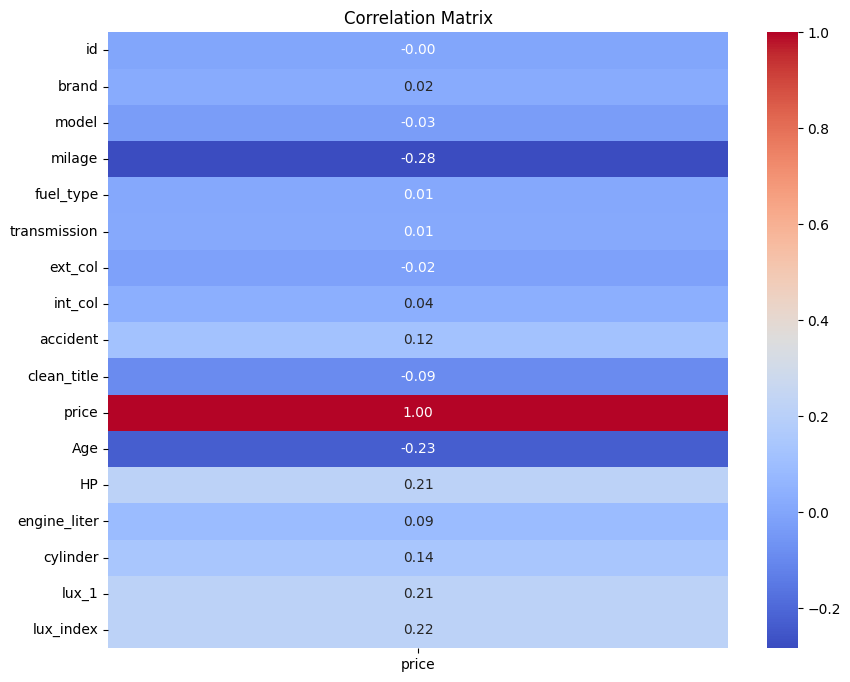

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt

price_corr = dtrain.corr()[['price']]

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(price_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [219]:
df_process

,id,brand,model,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Age,HP,engine_liter,cylinder,lux_1,lux_index
0,0,31,495,2.945022,3,38,312,71,1,1,4200.0,1.556096,-1.638878e+00,-1.636500,-1.673333e+00,17.16,-1.668662
1,1,28,930,1.549157,3,38,263,10,0,1,4999.0,2.438537,-8.711530e-01,0.096082,1.067894e+00,30.71,-0.876853
2,2,9,1575,1.418696,1,38,38,71,1,1,13900.0,2.438537,-2.185872e-01,1.150698,1.067894e+00,41.84,-0.211519
3,3,16,758,-0.927379,3,49,29,14,1,1,45000.0,-0.208784,7.410683e-01,0.924709,1.067894e+00,53.56,0.752339
4,4,36,1077,-1.169770,3,23,29,10,1,1,97500.0,-0.914736,-1.293402e+00,-1.335181,-1.673333e+00,51.24,-1.273152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314218,314218,36,760,0.349713,3,23,29,14,1,1,NaN,0.320680,1.844681e-01,-0.581885,-3.027195e-01,51.24,0.190299
314219,314219,3,1250,-0.730537,3,39,304,14,1,0,NaN,-0.561760,1.091002e-15,-0.581885,1.217349e-15,41.00,-0.006983
314220,314220,3,184,0.236022,3,38,29,14,1,1,NaN,0.673656,-9.383202e-02,-0.581885,-3.027195e-01,41.00,-0.100184
314221,314221,3,1246,0.923769,3,38,29,14,1,1,NaN,0.673656,-9.383202e-02,-0.581885,-3.027195e-01,41.00,-0.100184


In [220]:
price_corr

,price
id,-0.000877
brand,0.017657
model,-0.029866
milage,-0.283067
fuel_type,0.009757
transmission,0.014560
ext_col,-0.017342
int_col,0.035174
accident,0.118315
clean_title,-0.089433


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


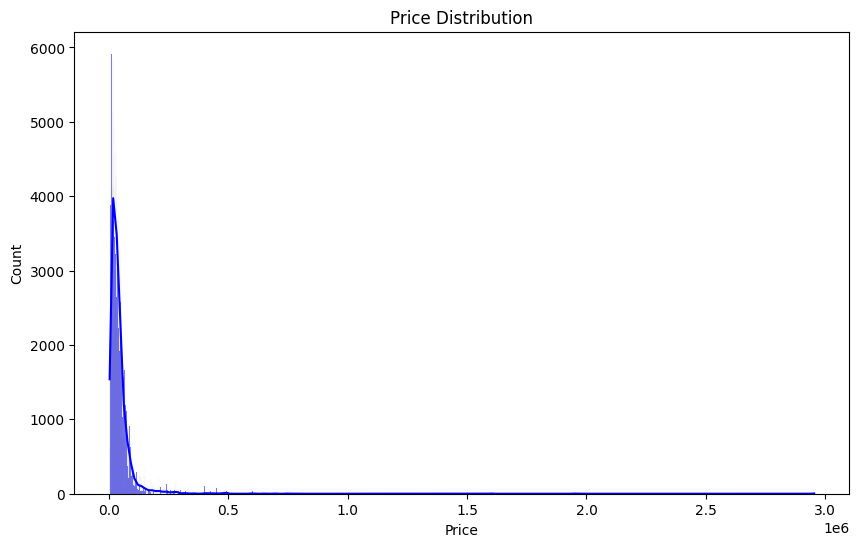

In [221]:
plt.figure(figsize=(10, 6))
sns.histplot(df_process['price'], kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.show()

**My output is skewed, so for doing better regression, i need to apply log transfrom for output then after prediction, i need to convert as it is (Dont Forget Convert, otherwise rmse value is no sense.)**> 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


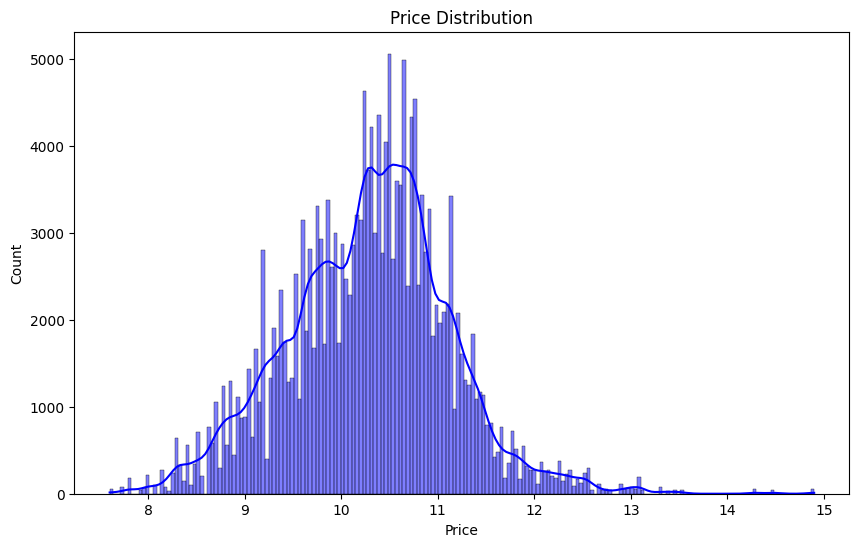

In [222]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df_process['price']), kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.show()

In [223]:
dtrain = df_process[:188533]
#y= dtrain['price']
y = np.log1p(dtrain['price'])
dtrain = dtrain.drop('price',axis =1)
dtrain = dtrain.drop('id',axis =1)

dtest = df_process[188533:]
dtest = dtest.drop('price',axis=1)
dtest = dtest.drop('id',axis =1)

#X_train, X_val, y_train, y_val = train_test_split(dtrain, y, test_size=0.2, random_state=42)

In [224]:
print(dtrain.shape)
print(dtest.shape)

(188533, 15)
(125690, 15)


In [227]:
dtrain

,brand,model,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,Age,HP,engine_liter,cylinder,lux_1,lux_index
0,31,495,2.945022,3,38,312,71,1,1,1.556096,-1.638878e+00,-1.636500,-1.673333e+00,17.16,-1.668662
1,28,930,1.549157,3,38,263,10,0,1,2.438537,-8.711530e-01,0.096082,1.067894e+00,30.71,-0.876853
2,9,1575,1.418696,1,38,38,71,1,1,2.438537,-2.185872e-01,1.150698,1.067894e+00,41.84,-0.211519
3,16,758,-0.927379,3,49,29,14,1,1,-0.208784,7.410683e-01,0.924709,1.067894e+00,53.56,0.752339
4,36,1077,-1.169770,3,23,29,10,1,1,-0.914736,-1.293402e+00,-1.335181,-1.673333e+00,51.24,-1.273152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,8,604,-0.337013,3,49,304,10,1,1,-0.208784,7.410683e-01,1.828664,1.067894e+00,45.66,0.743666
188529,36,206,-0.745266,3,31,304,14,0,1,-0.385272,4.051889e-01,-0.581885,-3.027195e-01,51.24,0.407924
188530,36,223,-1.044452,3,23,304,14,1,1,-0.914736,1.211300e+00,0.171412,1.067894e+00,51.24,1.209037
188531,3,1471,-1.039549,3,1,82,14,1,0,-1.091224,1.091002e-15,-0.581885,1.217349e-15,41.00,-0.006983


In [226]:
sdas

NameError: name 'sdas' is not defined

# Training with various models

In [228]:
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import lightgbm as lgb
from lightgbm import early_stopping
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor


import warnings
warnings.filterwarnings('ignore') 

In [229]:
#df_process=df_process.drop('lux',axis = 1)
#df_process=df_process.drop('clean_title',axis = 1)


dtrain = df_process[:188533]
#y= dtrain['price']
y = np.log1p(dtrain['price'])
dtrain = dtrain.drop('price',axis =1)
dtrain = dtrain.drop('id',axis =1)

dtest = df_process[188533:]
dtest = dtest.drop('price',axis=1)
dtest = dtest.drop('id',axis =1)

#X_train, X_val, y_train, y_val = train_test_split(dtrain, y, test_size=0.2, random_state=42)

In [230]:
X= dtrain

In [231]:
X

,brand,model,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,Age,HP,engine_liter,cylinder,lux_1,lux_index
0,31,495,2.945022,3,38,312,71,1,1,1.556096,-1.638878e+00,-1.636500,-1.673333e+00,17.16,-1.668662
1,28,930,1.549157,3,38,263,10,0,1,2.438537,-8.711530e-01,0.096082,1.067894e+00,30.71,-0.876853
2,9,1575,1.418696,1,38,38,71,1,1,2.438537,-2.185872e-01,1.150698,1.067894e+00,41.84,-0.211519
3,16,758,-0.927379,3,49,29,14,1,1,-0.208784,7.410683e-01,0.924709,1.067894e+00,53.56,0.752339
4,36,1077,-1.169770,3,23,29,10,1,1,-0.914736,-1.293402e+00,-1.335181,-1.673333e+00,51.24,-1.273152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,8,604,-0.337013,3,49,304,10,1,1,-0.208784,7.410683e-01,1.828664,1.067894e+00,45.66,0.743666
188529,36,206,-0.745266,3,31,304,14,0,1,-0.385272,4.051889e-01,-0.581885,-3.027195e-01,51.24,0.407924
188530,36,223,-1.044452,3,23,304,14,1,1,-0.914736,1.211300e+00,0.171412,1.067894e+00,51.24,1.209037
188531,3,1471,-1.039549,3,1,82,14,1,0,-1.091224,1.091002e-15,-0.581885,1.217349e-15,41.00,-0.006983


# LGBM:

In [251]:
from lightgbm import LGBMRegressor
#parameter setting

def lgb_prediction(X,features):
    X = X
    features = features
    X = X[features]

    lgb_params = {
        'learning_rate': np.linspace(0.01, 0.05, 5),    # Narrowed range for learning rate
        'num_leaves': np.arange(20, 100, 20),           # Reduced upper limit and step size
        'max_depth': [5, 7, 10],                        # Focus on reasonable depths
        'feature_fraction': np.linspace(0.7, 1.0, 4),   # Higher feature fraction range
        'bagging_fraction': np.linspace(0.7, 1.0, 4),   # Higher bagging fraction range
        'bagging_freq': [1, 3, 5],                      # Reduced frequencies
        'min_data_in_leaf': np.arange(20, 60, 10),      # Narrowed leaf range
        'lambda_l1': np.linspace(0, 0.5, 3),            # Smaller range for regularization
        'lambda_l2': np.linspace(0, 0.5, 3),            # Same for L2 regularization
        'max_bin': np.arange(100, 300, 50),             # Reduced bin range
        'n_estimators': [100, 200, 300]                 # Smaller range for estimators
        }

    total_rmse = 0
    model_lgb = {}
    rmse_val = {}


    #lbg_reg = lgb.LGBMRegressor()
    kf = KFold(n_splits= 10, shuffle = True, random_state = 42)
    

    for fold_nmb,(train_idx,val_idx) in enumerate(kf.split(X)):
        
        
            X_train,X_val = X.iloc[train_idx],X.iloc[val_idx]
            y_train,y_val = y[train_idx],y[val_idx]
    
            lgb_modeling = lgb.LGBMRegressor(random_state=42, verbose=-1,)
            
            print('setting randomized search parameters...')
            random_search_lgb = RandomizedSearchCV(
                                        estimator=lgb_modeling, 
                                        param_distributions= lgb_params,
                                        n_iter=8,  
                                        scoring='neg_mean_squared_error',
                                        cv=5, random_state=42, n_jobs=-1)
            print('finding best parameter')
            random_search_lgb.fit(X_train, y_train)
            lgb_model = random_search_lgb.best_estimator_
            print("Best Parameters:", lgb_model)

        
         
            lgb_model.fit(
                X_train, y_train,
                eval_set=[(X_val, y_val)],
                callbacks=[early_stopping(stopping_rounds=50)]
            )
        
                # Get feature importances
            importances = lgb_model.feature_importances_
            
            # Create DataFrame for feature importances
            importance_df = pd.DataFrame({
                'Feature': features,
                'Importance': importances
            })
           
            # Sort by importance
            importance_df = importance_df.sort_values(by='Importance', ascending=True)
            # Print feature importances
            print("Current feature importances:")
            print(importance_df)
            
            lgb_pred = lgb_model.predict(X_val)
            
            # Evaluate the model
            rmse_lgb = np.sqrt(np.mean((np.expm1(lgb_pred) - np.expm1(y_val))**2))
            total_rmse += rmse_lgb
            print('Fold:',fold_nmb+1)
            print(f'Regression RMSE: {rmse_lgb:.2f}')
            rmse_val[fold_nmb+1] = rmse_lgb

            model_lgb[fold_nmb+1] = lgb_model
        
            #y_prediction = lgb_model.predict(dtest[features])
            #prediction[fold_nmb+1] = np.expm1(y_prediction)
    
            print('-' * 50)
        
    print('total rmse:',total_rmse/10)

    return model_lgb , rmse_val


In [233]:
model_lgb_1,rmse_val_1 = lgb_prediction(X,X.columns)

setting randomized search parameters...
finding best parameter
Best Parameters: LGBMRegressor(bagging_fraction=0.7, bagging_freq=3,
              feature_fraction=0.7999999999999999, lambda_l1=0.0, lambda_l2=0.5,
              learning_rate=0.04, max_bin=150, max_depth=10,
              min_data_in_leaf=20, n_estimators=300, num_leaves=40,
              random_state=42, verbose=-1)
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[255]	valid_0's l2: 0.245313
Current feature importances:
         Feature  Importance
3      fuel_type          41
8    clean_title          69
7       accident         115
12      cylinder         156
13         lux_1         244
14     lux_index         357
11  engine_liter         389
6        int_col         416
10            HP         429
0          brand         464
4   transmission         749
5        ext_col         779
9            Age        1149
2         milage        1639
1          mo

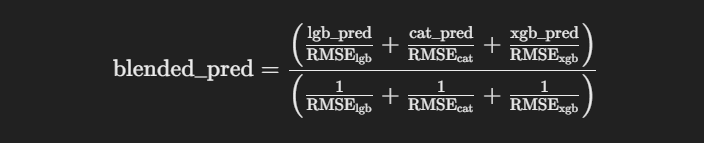
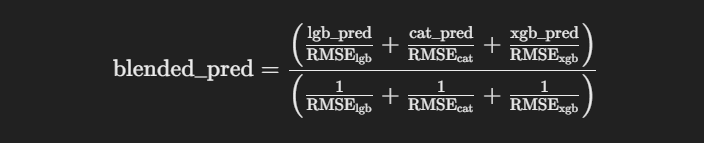
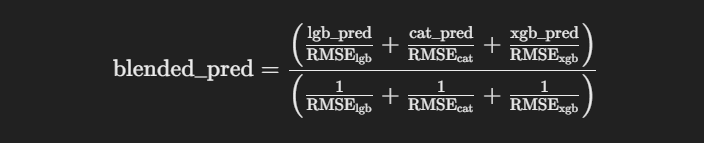
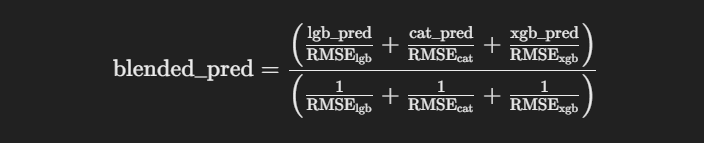

In [236]:
max_rmse1 = rmse_val_1[6]
max_pred1 = model_lgb_1[6].predict(dtest)
max_pred1 = np.expm1(max_pred1)

max_rmse2 = rmse_val_1[3]
max_pred2 = model_lgb_1[3].predict(dtest)
max_pred2 = np.expm1(max_pred2)

max_rmse3 = rmse_val_1[2]
max_pred3 = model_lgb_1[2].predict(dtest)
max_pred3 = np.expm1(max_pred3)

In [237]:
check_pred = (max_pred1/max_rmse1 + max_pred2/max_rmse2 + max_pred3/max_rmse3)/(1/max_rmse1 + 1/max_rmse2 + 1/max_rmse3) 

In [238]:
check_pred

array([16499.26518966, 64146.50441023, 48641.76344601, ...,
       16691.78386741, 13478.40600124, 37221.07032104])

In [240]:
a = list(set(X.columns.tolist()) - {'cylinder', 'clean_title', 'lux_1'})
model_lgb_2,rmse_val_2 = lgb_prediction(X,a)


setting randomized search parameters...
finding best parameter
Best Parameters: LGBMRegressor(bagging_fraction=0.7, bagging_freq=5,
              feature_fraction=0.7999999999999999, lambda_l1=0.5, lambda_l2=0.5,
              learning_rate=0.05, max_bin=250, max_depth=10,
              min_data_in_leaf=40, num_leaves=60, random_state=42, verbose=-1)
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.245231
Current feature importances:
         Feature  Importance
6      fuel_type          25
4       accident          99
11       int_col         162
0             HP         253
8        ext_col         326
9   engine_liter         347
2          brand         360
7      lux_index         377
10  transmission         466
3            Age         726
5         milage         988
1          model        1771
Fold: 1
Regression RMSE: 70043.61
--------------------------------------------------
setting randomized

In [244]:
check_pred_2

array([16369.80880728, 66067.73295867, 49445.44395875, ...,
       17024.82246907, 13337.96171198, 36969.00026926])

In [241]:
check_pred

array([16499.26518966, 64146.50441023, 48641.76344601, ...,
       16691.78386741, 13478.40600124, 37221.07032104])

# XGBOOST:

In [265]:
import xgboost as xgb
#from xgboost.callback import EarlyStopping


#parameter setting

def xgb_prediction(X,features):
    X = X
    features = features
    X = X[features]

    xgb_params = {
    'learning_rate': np.linspace(0.01, 0.1, 5),        # Smaller learning rates for better convergence
    'max_depth': [3, 5, 7, 10],                        # Range of tree depths
    'n_estimators': [100, 200, 500],                   # Number of boosting rounds
    'min_child_weight': [1, 3, 5],                     # Minimum sum of instance weight (hessian) in a child
    'subsample': np.linspace(0.6, 1.0, 5),             # Subsample ratio of the training instance
    'colsample_bytree': np.linspace(0.6, 1.0, 5),      # Subsample ratio of columns when constructing trees
    'gamma': [0, 0.1, 0.2, 0.5],                       # Minimum loss reduction to make a split
    'reg_alpha': np.linspace(0, 1.0, 5),               # L1 regularization term on weights
    'reg_lambda': np.linspace(1, 5, 5),                # L2 regularization term on weights
    'max_bin': [256, 512, 1024],                       # Number of bins for histogram-based tree
    'verbosity': [0],                                  # Suppress logs for cleaner output
    'tree_method': ['hist'],                           # Use histogram-based tree construction for efficiency
    'random_state': [42],                              # Ensure reproducibility
}

    total_rmse = 0
    model_xgb = {}
    rmse_val = {}


    #lbg_reg = lgb.LGBMRegressor()
    kf = KFold(n_splits= 10, shuffle = True, random_state = 42)
    

    for fold_nmb,(train_idx,val_idx) in enumerate(kf.split(X)):
        
        
            X_train,X_val = X.iloc[train_idx],X.iloc[val_idx]
            y_train,y_val = y[train_idx],y[val_idx]
    
            xgb_modeling = xgb.XGBRegressor(random_state=42, 
                                             verbose=-1, 
                                             tree_method='hist',  # Required for categorical support
                                             enable_categorical=True,  # Enable categorical handling
                                            )

            
            print('setting randomized search parameters...')
            random_search_xgb = RandomizedSearchCV(
                                        estimator=xgb_modeling, 
                                        param_distributions= xgb_params,
                                        n_iter=8,  
                                        scoring='neg_mean_squared_error',
                                        cv=5, random_state=42, n_jobs=-1)
            print('finding best parameter')
            random_search_xgb.fit(X_train, y_train)
            xgb_model = random_search_xgb.best_estimator_
            print("Best Parameters:", xgb_model)
         
            xgb_model.fit(
                X_train, y_train,
                eval_set=[(X_val, y_val)])
        
                # Get feature importances
            importances = xgb_model.feature_importances_
            
            # Create DataFrame for feature importances
            importance_df = pd.DataFrame({
                'Feature': features,
                'Importance': importances
            })
           
            # Sort by importance
            importance_df = importance_df.sort_values(by='Importance', ascending=True)
            # Print feature importances
            print("Current feature importances:")
            print(importance_df)
            
            xgb_pred = xgb_model.predict(X_val)
            
            # Evaluate the model
            rmse_xgb = np.sqrt(np.mean((np.expm1(xgb_pred) - np.expm1(y_val))**2))
            total_rmse += rmse_xgb
            print('Fold:',fold_nmb+1)
            print(f'Regression RMSE: {rmse_xgb:.2f}')
            rmse_val[fold_nmb+1] = rmse_xgb

            model_xgb[fold_nmb+1] = xgb_model
        
            #y_prediction = lgb_model.predict(dtest[features])
            #prediction[fold_nmb+1] = np.expm1(y_prediction)
    
            print('-' * 50)
        
    print('total rmse:',total_rmse/10)

    return model_xgb , rmse_val


In [249]:
len(X.columns)

15

In [254]:
X.dtypes

brand           category
model           category
milage           float64
fuel_type       category
transmission    category
ext_col         category
int_col         category
accident        category
clean_title     category
Age              float64
HP               float64
engine_liter     float64
cylinder         float64
lux_1            float64
lux_index        float64
dtype: object

In [266]:
model_xgb_1,rmse_val_3 = xgb_prediction(X,X.columns)

setting randomized search parameters...
finding best parameter
Best Parameters: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=0.5, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=256,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
[0]	validation_0-rmse:0.79854
[1]	validation_0-rmse:0.75358
[2]	validation_0-rmse:0.71454
[3]	validation_0-rmse:0.68261
[4]	validation_0-rmse:0.66069
[5]	validation_0-rmse:0.63463
[6]	val

In [272]:
overall_dict['rmse_val_1']

{1: 69940.3730680006,
 2: 67382.76354620818,
 3: 62856.86927849433,
 4: 74938.00478533871,
 5: 85673.83989284805,
 6: 61200.99328366039,
 7: 75400.49210339048,
 8: 78840.68509569563,
 9: 72126.16142841306,
 10: 81881.23092416838}

rmse_val_1
rmse_val_2
rmse_val_3


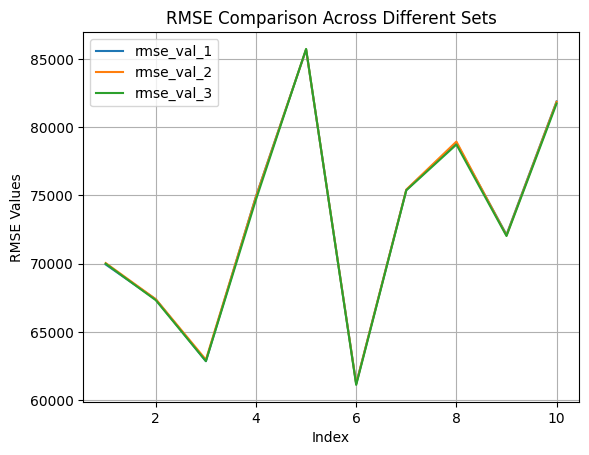

In [290]:
overall_dict = {
    'rmse_val_1':rmse_val_1,
    'rmse_val_2':rmse_val_2,
    'rmse_val_3':rmse_val_3
}

for k in overall_dict.keys():
    temp = []
    for values in overall_dict[k].values():
        temp.append(values)
    print(k)
    plt.plot(range(1,len(temp)+1),temp,label = k)
# Adding labels, title, and legend
plt.xlabel('Index')
plt.ylabel('RMSE Values')
plt.title('RMSE Comparison Across Different Sets')
plt.legend()
plt.grid(True)


In [291]:
model_lgb_1

{1: LGBMRegressor(bagging_fraction=0.7, bagging_freq=3,
               feature_fraction=0.7999999999999999, lambda_l1=0.0, lambda_l2=0.5,
               learning_rate=0.04, max_bin=150, max_depth=10,
               min_data_in_leaf=20, n_estimators=300, num_leaves=40,
               random_state=42, verbose=-1),
 2: LGBMRegressor(bagging_fraction=0.7, bagging_freq=5,
               feature_fraction=0.7999999999999999, lambda_l1=0.5, lambda_l2=0.5,
               learning_rate=0.05, max_bin=250, max_depth=10,
               min_data_in_leaf=40, num_leaves=60, random_state=42, verbose=-1),
 3: LGBMRegressor(bagging_fraction=0.7, bagging_freq=3,
               feature_fraction=0.7999999999999999, lambda_l1=0.0, lambda_l2=0.5,
               learning_rate=0.04, max_bin=150, max_depth=10,
               min_data_in_leaf=20, n_estimators=300, num_leaves=40,
               random_state=42, verbose=-1),
 4: LGBMRegressor(bagging_fraction=0.7, bagging_freq=5,
               feature_fraction=0.7

In [292]:
model_lgb_2

{1: LGBMRegressor(bagging_fraction=0.7, bagging_freq=5,
               feature_fraction=0.7999999999999999, lambda_l1=0.5, lambda_l2=0.5,
               learning_rate=0.05, max_bin=250, max_depth=10,
               min_data_in_leaf=40, num_leaves=60, random_state=42, verbose=-1),
 2: LGBMRegressor(bagging_fraction=0.7, bagging_freq=5,
               feature_fraction=0.7999999999999999, lambda_l1=0.5, lambda_l2=0.5,
               learning_rate=0.05, max_bin=250, max_depth=10,
               min_data_in_leaf=40, num_leaves=60, random_state=42, verbose=-1),
 3: LGBMRegressor(bagging_fraction=0.7, bagging_freq=5,
               feature_fraction=0.7999999999999999, lambda_l1=0.5, lambda_l2=0.5,
               learning_rate=0.05, max_bin=250, max_depth=10,
               min_data_in_leaf=40, num_leaves=60, random_state=42, verbose=-1),
 4: LGBMRegressor(bagging_fraction=0.7, bagging_freq=5,
               feature_fraction=0.7999999999999999, lambda_l1=0.5, lambda_l2=0.5,
               lear

In [293]:
model_xgb_1

{1: XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=256,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 2: XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric

# Compelling XGB harder:

In [314]:
import xgboost as xgb
#from xgboost.callback import EarlyStopping


#parameter setting

def xgb_updated(X,features):
    X = X
    features = features
    X = X[features]

    xgb_params = {
    'learning_rate': np.linspace(0.01, 0.1, 5),        # Smaller learning rates for better convergence
    'max_depth': [3, 5, 7, 10],                        # Range of tree depths
    'n_estimators': [100, 200, 500],                   # Number of boosting rounds
    'min_child_weight': [1, 3, 5],                     # Minimum sum of instance weight (hessian) in a child
    'subsample': np.linspace(0.6, 1.0, 5),             # Subsample ratio of the training instance
    'colsample_bytree': np.linspace(0.6, 1.0, 5),      # Subsample ratio of columns when constructing trees
    'gamma': [0, 0.1, 0.2, 0.5],                       # Minimum loss reduction to make a split
    'reg_alpha': np.linspace(0, 1.0, 5),               # L1 regularization term on weights
    'reg_lambda': np.linspace(1, 5, 5),                # L2 regularization term on weights
    'max_bin': [256, 512, 1024],                       # Number of bins for histogram-based tree
    'verbosity': [0],                                  # Suppress logs for cleaner output
    'tree_method': ['hist'],                           # Use histogram-based tree construction for efficiency
    'random_state': [42],                              # Ensure reproducibility
}

    total_rmse = 0
    model_xgb = {}
    rmse_val = {}


    #lbg_reg = lgb.LGBMRegressor()
    kf = KFold(n_splits= 15, shuffle = True, random_state = 42)
    

    for fold_nmb,(train_idx,val_idx) in enumerate(kf.split(X)):
        
        
            X_train,X_val = X.iloc[train_idx],X.iloc[val_idx]
            y_train,y_val = y[train_idx],y[val_idx]
    
            xgb_modeling = xgb.XGBRegressor(random_state=42, 
                                             verbose=-1, 
                                             tree_method='hist',  # Required for categorical support
                                             enable_categorical=True,  # Enable categorical handling
                                            )

            
            print('setting randomized search parameters...')
            random_search_xgb = RandomizedSearchCV(
                                        estimator=xgb_modeling, 
                                        param_distributions= xgb_params,
                                        n_iter=10,  
                                        scoring='neg_mean_squared_error',
                                        cv=5, random_state=42, n_jobs=-1)
            print('finding best parameter')
            random_search_xgb.fit(X_train, y_train)
            xgb_model = random_search_xgb.best_estimator_
            print("Best Parameters:", xgb_model)
         
            xgb_model.fit(
                X_train, y_train,
                eval_set=[(X_val, y_val)])
        
                # Get feature importances
            importances = xgb_model.feature_importances_
            
            # Create DataFrame for feature importances
            importance_df = pd.DataFrame({
                'Feature': features,
                'Importance': importances
            })
           
            # Sort by importance
            importance_df = importance_df.sort_values(by='Importance', ascending=True)
            # Print feature importances
            print("Current feature importances:")
            print(importance_df)
            
            xgb_pred = xgb_model.predict(X_val)
            
            # Evaluate the model
            rmse_xgb = np.sqrt(np.mean((np.expm1(xgb_pred) - np.expm1(y_val))**2))
            total_rmse += rmse_xgb
            print('Fold:',fold_nmb+1)
            print(f'Regression RMSE: {rmse_xgb:.2f}')
            rmse_val[fold_nmb+1] = rmse_xgb

            model_xgb[fold_nmb+1] = xgb_model
        
            #y_prediction = lgb_model.predict(dtest[features])
            #prediction[fold_nmb+1] = np.expm1(y_prediction)
    
            print('-' * 50)
        
    print('total rmse:',total_rmse/10)

    return model_xgb , rmse_val


In [315]:
model_upt,rmse_upt =xgb_updated(X,X.columns)

setting randomized search parameters...
finding best parameter
Best Parameters: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=0.5, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=256,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
[0]	validation_0-rmse:0.80045
[1]	validation_0-rmse:0.75541
[2]	validation_0-rmse:0.71599
[3]	validation_0-rmse:0.68386
[4]	validation_0-rmse:0.66191
[5]	validation_0-rmse:0.63575
[6]	val

In [319]:
rmse_upt

{1: 64053.69260746325,
 2: 71416.60663588678,
 3: 70268.82104095978,
 4: 60423.354362787475,
 5: 69000.34174888168,
 6: 76628.54254730932,
 7: 82989.74439101847,
 8: 76834.70909190124,
 9: 61776.349112101096,
 10: 78733.95975743138,
 11: 87601.34740598357,
 12: 63013.36296095545,
 13: 65868.78938635488,
 14: 81988.6314608744,
 15: 82211.63829596304}

In [320]:
model_upt

{1: XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=256,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 2: XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric

In [342]:
rmse_upt

{1: 64053.69260746325,
 2: 71416.60663588678,
 3: 70268.82104095978,
 4: 60423.354362787475,
 5: 69000.34174888168,
 6: 76628.54254730932,
 7: 82989.74439101847,
 8: 76834.70909190124,
 9: 61776.349112101096,
 10: 78733.95975743138,
 11: 87601.34740598357,
 12: 63013.36296095545,
 13: 65868.78938635488,
 14: 81988.6314608744,
 15: 82211.63829596304}

In [336]:
rmse_upt[4]

60423.354362787475

In [343]:
rmse_upt[9]

61776.349112101096

In [329]:
pred_comp_xgb_4 = model_upt[4].predict(dtest)
pred_comp_xgb_4 = np.expm1(pred_comp_xgb_4)

In [337]:
pred_comp_xgb_4

array([14386.469, 67563.38 , 47926.508, ..., 16380.157, 14576.222,
       36056.094], dtype=float32)

# Submission:

In [346]:
print(rmse_val_1[6])
print(rmse_val_2[6])
print(rmse_val_3[6])
print(rmse_upt[4])

61200.99328366039
61204.46204129824
61119.23463823731
60423.354362787475


In [296]:
pred1 = model_lgb_1[6].predict(dtest)
pred1 = np.expm1(pred1)

In [298]:
a = list(set(dtest.columns.tolist()) - {'cylinder', 'clean_title', 'lux_1'})
dtest_2 = dtest[a]

pred2 = model_lgb_2[6].predict(dtest_2)
pred2 = np.expm1(pred2)

In [303]:
pred3 = model_xgb_1[6].predict(dtest)
pred3 = np.expm1(pred3)

In [308]:
myfinal_1 = (pred1/rmse_val_1[6] + pred2/rmse_val_2[6] + pred3/rmse_val_3[6])/(1/rmse_val_1[6] + 1/rmse_val_2[6] + 1/rmse_val_3[6]) 
myfinal_2 = pred1*0.25 + pred2*0.25 + pred3*0.5

In [310]:
myfinal_2

array([16034.89630959, 67315.12014533, 49314.3193538 , ...,
       16979.96038666, 13815.78576946, 36348.9195044 ])

In [311]:
submission = pd.DataFrame({
    'id': dsub['id'],  
    'price': myfinal_1
})
submission.to_csv('final_1.csv', index=False)
print("Submission file created!")


submission = pd.DataFrame({
    'id': dsub['id'],  
    'price': myfinal_2
})
submission.to_csv('final_2.csv', index=False)
print("Submission file created!")

Submission file created!
Submission file created!


In [312]:
submission = pd.DataFrame({
    'id': dsub['id'],  
    'price': pred3
})
submission.to_csv('final_3.csv', index=False)
print("Submission file created!")

Submission file created!


In [349]:
compel_1 = pred_comp_xgb_4*0.6 + pred3*0.30 + pred1*0.10

In [351]:
submission = pd.DataFrame({
    'id': dsub['id'],  
    'price': pred_comp_xgb_4
})
submission.to_csv('ttfinal.csv', index=False)
print("Submission file created!")

Submission file created!


In [350]:
submission = pd.DataFrame({
    'id': dsub['id'],  
    'price': compel_1
})
submission.to_csv('tfinal.csv', index=False)
print("Submission file created!")

Submission file created!
